In [8]:
import json


class QuerySerializer:
    def __init__(self, DG):
        self.DG = DG

    def serialize(self):
        query_result = dict()

        query_result["graph"] = self.create_graph_interface()
        query_result["user"] = self.create_user_data()

        return json.dumps(query_result)

    def create_graph_interface(self, node_new_feature=None, edge_new_feature=None):
        if node_new_feature:
            nodes = {node: features.update(node_new_feature) for node , features in self.DG.nodes(data=True)}
        else:
            nodes = {node: features for node , features in self.DG.nodes(data=True)}

        if edge_new_feature:
            edges = {source+"-->"+target: features.update({"from": source, "to":target}).update(edge_new_feature)
                    for source, target, features in self.DG.edges(data=True)}
        else:
            edges = {source+"-->"+target: features.update({"from": source, "to":target})
                        for source, target, features in self.DG.edges(data=True)}

        meta = self.create_graph_meta()
        return {"nodes": nodes,
                "edges": edges,
                "meta": meta}

    def create_graph_meta(self):
        settings = self.create_settings()
        filters = self.create_filters()
        centerNodeId = None

        return {"settings": settings,
                "filters": filters,
                "centerNodeId": centerNodeId}

    def create_settings(self, key: str=None, values=None):
        if not key:
            return None
        value = self.create_variable_properties(values)

        return {key: value}

    def create_filters(self, key: str=None, values=None):
        if not key:
            return None
        value = self.create_variable_properties()

        return {key: value}

    def create_variable_properties(self, values):
        return {
            "enable": values.get("enable", None),
            "editable": values.get("editable", None),
            "type": values.get("type", None),
            "options": values.get("options", None),
            "value": values.get("value", None),
            "children": values.get("children", None)
        }

    def create_user_data(self):
        return {"nodeCountLimit": None,
                "hasAccess": None}


In [22]:
import networkx as nx
import pandas as pd
# from dtl.graph_dtl import GraphDTL


class GraphBaseModule(object):
    def __init__(self, nodes=None, edges=None, read_from_db=False):
        self.nodes = nodes
        self.edges = edges

#         if read_from_db:
#             self.graph_dtl = GraphDTL()
#             self.nodes = self.graph_dtl.get_nodes()
#             self.edges = self.graph_dtl.get_edges


        if not (self.nodes and self.edges):
            self.nodes = pd.read_csv(
                "../sample_data/MajedAlasmariAP-nodes.csv")
            self.edges = pd.read_csv(
                "../sample_data/MajedAlasmariAP-edges.csv")

    def get_graph(self):
        return self.DG

    def create(self):
        self.DG = nx.DiGraph()

        for idx, node in self.nodes.iterrows():

            node_id = node['Id']
            del node['Id']

            attributes = {node_id: node}

            self.DG.add_node(node_id)
            nx.set_node_attributes(self.DG, attributes)

        for idx, edge in self.edges.iterrows():
            source, target = edge['Source'], edge['Target']
            del edge['Source'], edge['Target']

            attributes = {(source, target): edge}

            self.DG.add_edge(source, target)
            nx.set_edge_attributes(self.DG, attributes)

    def show_random(self, graph=None):
        import matplotlib.pyplot as plt

        plt.figure(figsize=(15, 12))
        if graph:
            nx.draw_random(graph)
        else:
            nx.draw_random(self.DG)
        plt.show()

    

In [101]:
# import networkx as nx
# from graph.base import GraphBaseModule


class TopologyModule(GraphBaseModule):
    def __init__(self, DG=None):
        self.DG = DG
        if not self.DG:
            super(TopologyModule, self).__init__()
            self.create()

    def mutuals(self, node: str = None, depth_limit: int = None):
        mutual_graph = nx.Graph()

        if depth_limit is None:
            nodes = list(self.DG.nodes())
            num_nodes = len(nodes)

            for i in range(num_nodes):
                for j in range(i+1, num_nodes):
                    if self.DG.has_edge(nodes[i], nodes[j]) and self.DG.has_edge(nodes[j], nodes[i]):
                        mutual_graph.add_edge(nodes[i], nodes[j])

            return mutual_graph

        else:
            not_visited = list()
            not_visited.append(node)

            depth = 0
            while len(not_visited) != 0:
                depth += 1
                current_node = not_visited.pop(0)
                for (source, target) in self.DG.edges(current_node):
                    if self.DG.has_edge(target, source):
                        not_visited.append(target)
                        mutual_graph.add_edge(source, target)

                if depth == depth_limit:
                    break

            return mutual_graph


    def neighbor_depth(self, node, neighbor_depth):
#         neighbours_graph = nx.DiGraph()
    
#         visited = set()
#         not_visited = list()
#         not_visited.append(node)
        

#         depth = 0
#         while len(not_visited) != 0:
#             depth += 1
#             current_node = not_visited.pop(0)
#             for source, target in self.DG.edges(current_node):
#                 if target not in visited:
#                     not_visited.append(target)
#                     neighbours_graph.add_edge(source, target)
            
#             visited.add(current_node)

#             if depth == neighbor_depth:
#                 break
        
#         return neighbours_graph

        neighbours_graph = nx.DiGraph()
        for source, target in nx.bfs_edges(module.DG, node, depth_limit=neighbor_depth):
            neighbours_graph.add_edge(s, t)
            
        return neighbours_graph

In [102]:
module = TopologyModule()

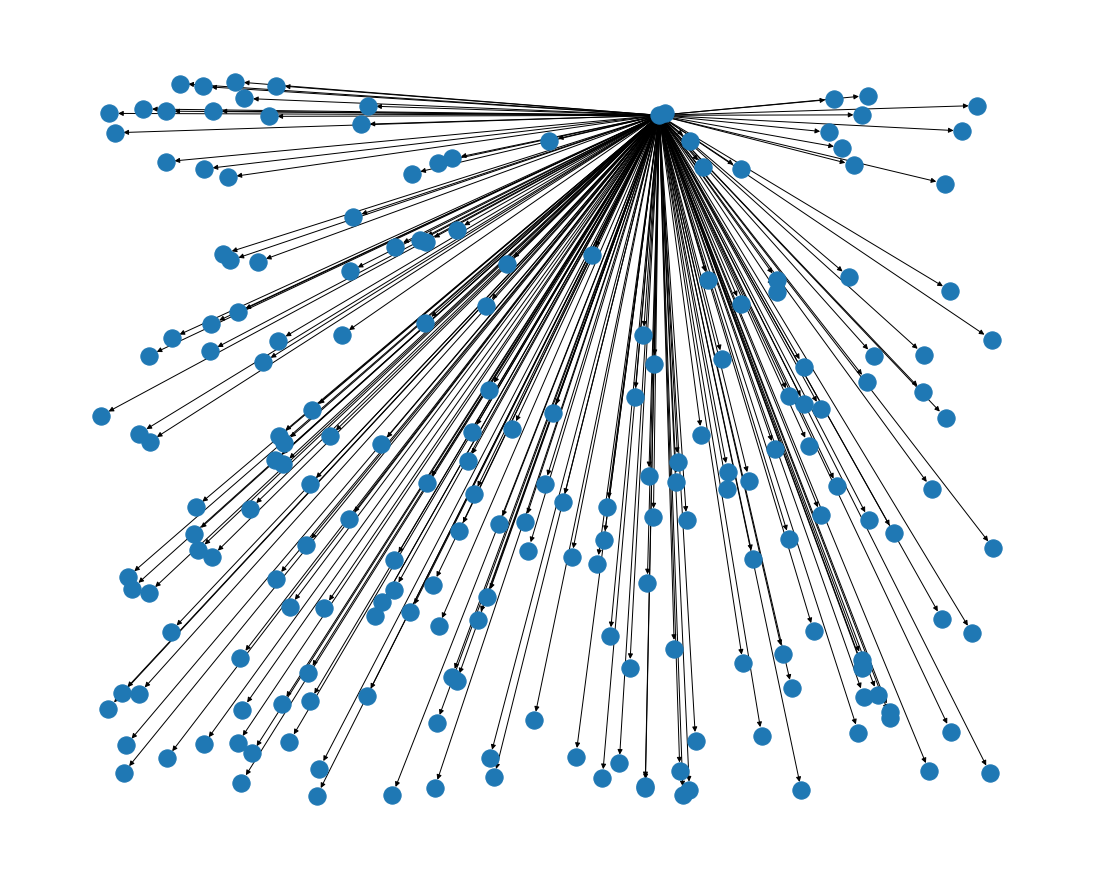

In [100]:
show(g)

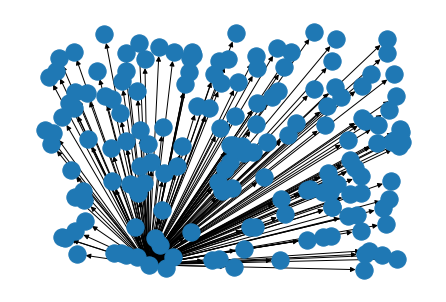

In [71]:
nx.draw_random(g)

In [88]:
for i in [1, 2, 3, 4, 5, 10]:
    gra = nx.DiGraph()
    for s, t in nx.bfs_edges(module.DG, "NasserAlajmi89", depth_limit=i):
        gra.add_edge(s, t)
        
    print(i, len(gra.nodes()))

1 204
2 672
3 741
4 744
5 744
10 744


In [89]:
len(module.DG.nodes())

811

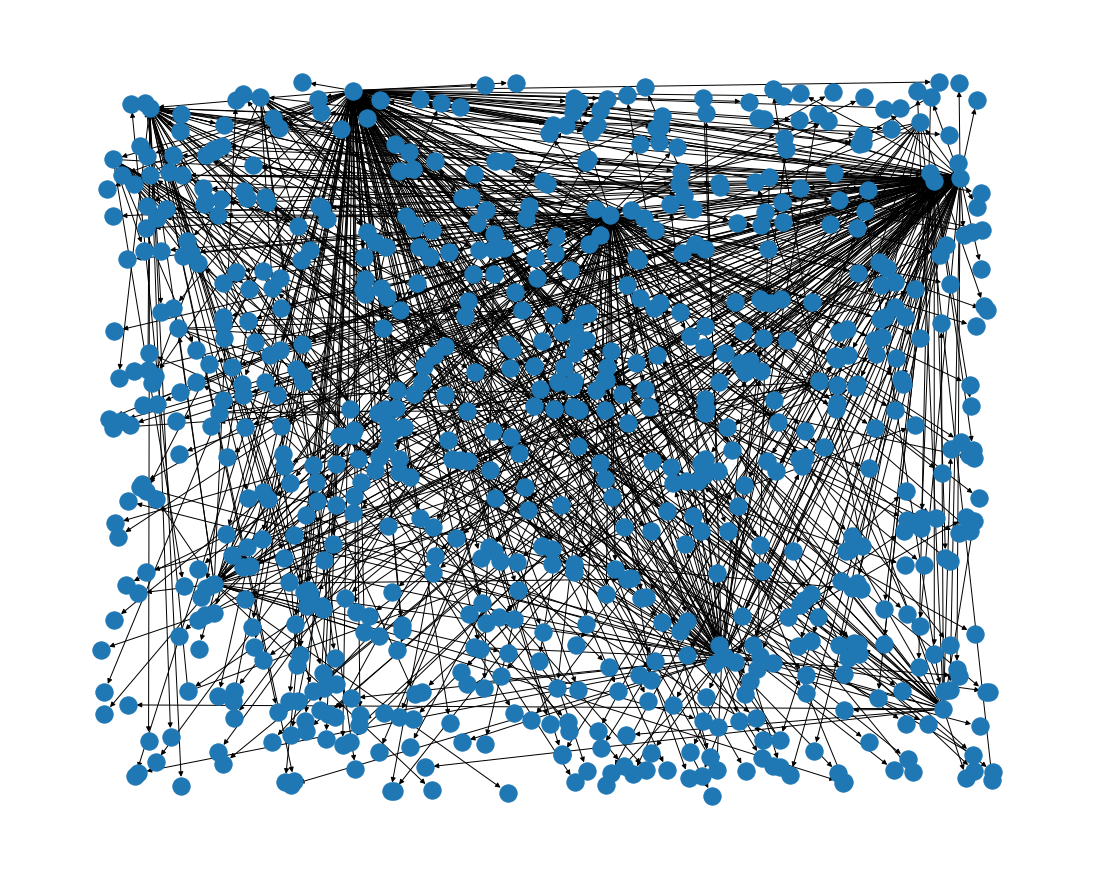

In [84]:
show(gra)

In [50]:
def show(graph):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 12))
    nx.draw_random(graph)
    plt.show()